In [2]:
# moduły
import numpy as np
import math
import matplotlib.pyplot as plt
from numba import jit

# Zadanie 1 - podstawowy algorytm

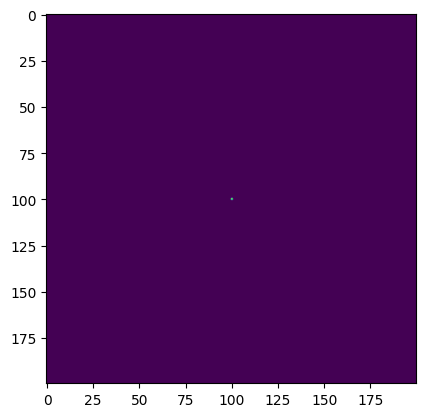

0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


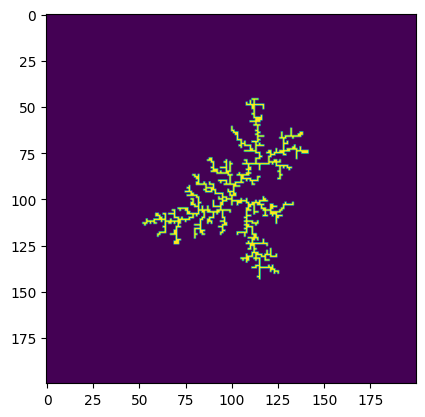

In [12]:
size = 200
centre = 100
lattice = np.zeros([size, size])
lattice[centre, centre] = 1
distances = [0,]                      # list with distances of each particle from centre; max is radius
steps = [np.array([0, 1]), np.array([0, -1]), np.array([1, 0]), np.array([-1, 0])]

def random_step(x):
    i = np.random.choice([0, 1, 2, 3])
    return x + steps[i]

def dist_from_centre(x):
    return np.sqrt((x[0] - centre)**2 + (x[1] - centre)**2)

def stay_here(x):
    neighbors = [x + steps[i] for i in range(4)]
    bool_list = []
    try:
        for n in neighbors:
            bool_list.append(lattice[n[0], n[1]] == 1)
        if any(bool_list):
            distances.append(dist_from_centre(x))
            lattice[x[0], x[1]] = 1
        return any(bool_list)
    except:
        return False

def create_particle():
    radius = max(distances) + 10
    phase = np.random.uniform(low = 0, high = 2 * np.pi)
    x = np.array([centre + math.floor(radius * np.sin(phase)), centre + math.floor(radius * np.cos(phase))])
    return x

def stay_here(x):
    neighbors = [x + steps[i] for i in range(4)]
    bool_list = []
    try:
        for n in neighbors:
            bool_list.append(lattice[n[0], n[1]] == 1)
        if any(bool_list):
            distances.append(dist_from_centre(x))
            lattice[x[0], x[1]] = 1
        return any(bool_list)
    except:
        return False

def release_particle(x):
    radius = max(distances) + 50
    while True:
        x = random_step(x)
        if stay_here(x) or dist_from_centre(x) > radius:
            break

plt.imshow(lattice)
plt.show()

number_of_particles = 2000

for p in range(number_of_particles):
     x = create_particle()
     release_particle(x)
     if p % 200 == 0:
        print(str(p/20) + "%")

plt.imshow(lattice)
plt.show()

# Zadanie 2 - z prawdopodobieństwem przyłączenia

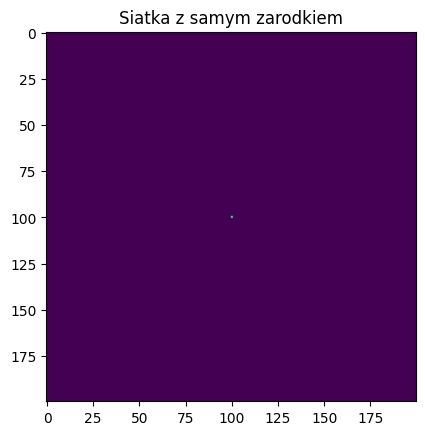

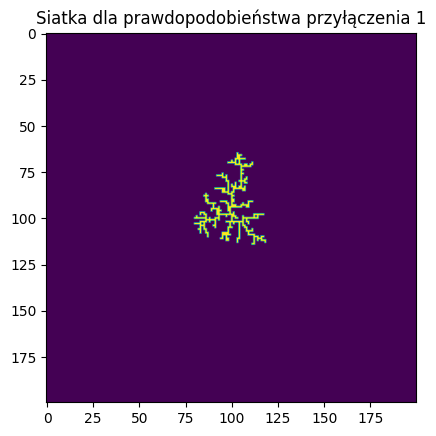

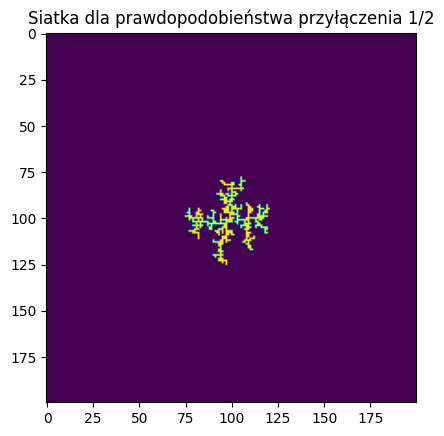

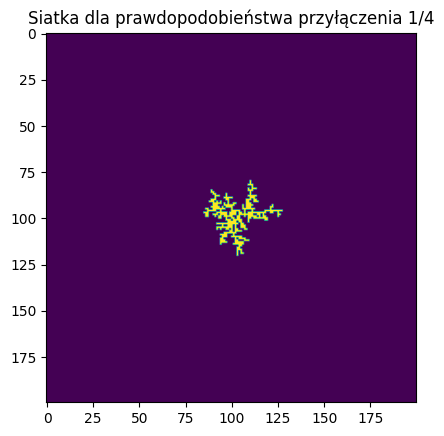

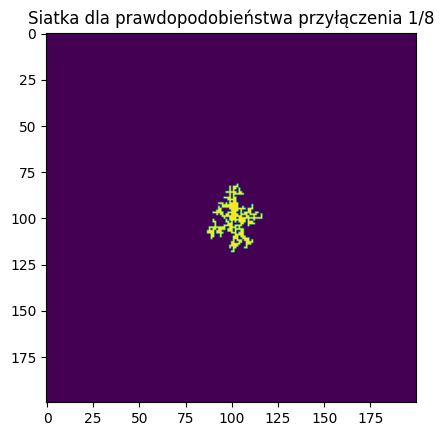

In [11]:
size = 200
centre = 100
lattice_2 = np.zeros([size, size])
lattice_2[centre, centre] = 1
distances = [0,]                      # list with distances of each particle from centre; max is radius
steps = [np.array([0, 1]), np.array([0, -1]), np.array([1, 0]), np.array([-1, 0])]

def random_step(x):
    i = np.random.choice([0, 1, 2, 3])
    return x + steps[i]

def dist_from_centre(x):
    return np.sqrt((x[0] - centre)**2 + (x[1] - centre)**2)

def stay_here_2(x, prob):
    neighbors = [x + steps[i] for i in range(4)]
    bool_list = []
    for n in neighbors:
        bool_list.append(lattice_2[n[0], n[1]] == 1)

    p = np.random.uniform(0, 1)
        
    if any(bool_list) and p < prob:
        distances.append(dist_from_centre(x))
        lattice_2[x[0], x[1]] = 1
        return True
    return False

def release_particle_2(x, prob):
    radius = max(distances) + 30
    while True:
        y = random_step(x)
        if(lattice_2[y[0], y[1]] != 1):
            x = y
            if stay_here_2(x, prob) or dist_from_centre(x) > radius:
                break
        else:
            continue

def create_particle():
    radius = max(distances) + 10
    phase = np.random.uniform(low = 0, high = 2 * np.pi)
    x = np.array([centre + math.floor(radius * np.sin(phase)), centre + math.floor(radius * np.cos(phase))])
    return x

number_of_particles = 1000

# czysta siatka

plt.imshow(lattice_2)
plt.title("Siatka z samym zarodkiem")
plt.show()

# p-stwo 1

lattice_2 = np.zeros([size, size])
lattice_2[centre, centre] = 1
distances = [0,] 

for p in range(number_of_particles):
     x = create_particle()
     release_particle_2(x, 1)

plt.imshow(lattice_2)
plt.title("Siatka dla prawdopodobieństwa przyłączenia 1")
plt.show()

# p-stwo 1/2

lattice_2 = np.zeros([size, size])
lattice_2[centre, centre] = 1
distances = [0,] 

for p in range(number_of_particles):
     x = create_particle()
     release_particle_2(x, 1/2)

plt.imshow(lattice_2)
plt.title("Siatka dla prawdopodobieństwa przyłączenia 1/2")
plt.show()

# p-stwo 1/4

lattice_2 = np.zeros([size, size])
lattice_2[centre, centre] = 1
distances = [0,] 

for p in range(number_of_particles):
     x = create_particle()
     release_particle_2(x, 1/4)

plt.imshow(lattice_2)
plt.title("Siatka dla prawdopodobieństwa przyłączenia 1/4")
plt.show()

# p-stwo 1/8

lattice_2 = np.zeros([size, size])
lattice_2[centre, centre] = 1
distances = [0,] 

for p in range(number_of_particles):
     x = create_particle()
     release_particle_2(x, 1/8)

plt.imshow(lattice_2)
plt.title("Siatka dla prawdopodobieństwa przyłączenia 1/8")
plt.show()

# Zadanie 3 - redukcja szumu

0.0%
5.0%
10.0%
15.0%
20.0%
25.0%
30.0%
35.0%
40.0%
45.0%


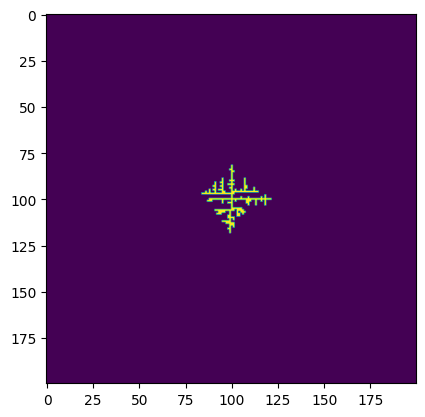

In [18]:
size = 200
centre = size // 2
lattice = np.zeros([size, size])
lattice[centre, centre] = -1
distances = [0,]                      # list with distances of each particle from centre; max is radius
steps = [np.array([0, 1]), np.array([0, -1]), np.array([1, 0]), np.array([-1, 0])]

def random_step(x):
    i = np.random.choice([0, 1, 2, 3])
    return x + steps[i]

def dist_from_centre(x):
    return np.sqrt((x[0] - centre)**2 + (x[1] - centre)**2)

def stay_here(x):
    neighbors = [x + steps[i] for i in range(4)]
    bool_list = []
    for n in neighbors:
        bool_list.append(lattice[n[0], n[1]] == -1)
    if any(bool_list):
        lattice[x[0], x[1]] += 1
        if lattice[x[0], x[1]] == 8:
            distances.append(dist_from_centre(x))
            lattice[x[0], x[1]] = -1

    return any(bool_list)

def create_particle():
    radius = max(distances) + 10
    phase = np.random.uniform(low = 0, high = 2 * np.pi)
    x = np.array([centre + math.floor(radius * np.sin(phase)), centre + math.floor(radius * np.cos(phase))])
    return x

def release_particle(x):
    radius = max(distances) + 50
    while True:
        x = random_step(x)
        if stay_here(x) or dist_from_centre(x) > radius:
            break

number_of_particles = 5000

for p in range(number_of_particles):
     x = create_particle()
     release_particle(x)
     if p % 500 == 0:
        print(str(p / 50) + "%")

lattice[lattice > 0] = 0
lattice[lattice == -1] = 1

plt.imshow(lattice)
plt.show()